<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salariesd

In [ ]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"
URL2 = 'https://www.indeed.co.uk/jobs?q=Junior+Data+Scientist&l=London&radius=10'

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import time  
from tqdm import tqdm
import re
import numpy as np
import pandas as pd

In [ ]:
## Get HTML file 
r = requests.get(URL2)
soup = BeautifulSoup(r.text,'html.parser')


In [ ]:
soup.find_all('div',class_='result')

In [ ]:
## YOUR CODE HERE #Account for Null returns 
def extract_location_from_result(result):
    try:
        try:
            return  result.find('span',class_='location').text
        except:
            return result.find('div',class_='location').text
    except:
        return np.nan

In [ ]:
result = soup.find('div',class_='result')
extract_location_from_result(result)

In [ ]:
def extract_company_from_result(result):
    try:
        return  result.find('span',class_='company').text
    except:
        return np.nan

In [ ]:
result = soup.find('div',class_='result')
extract_company_from_result(result)

In [ ]:
def extract_job_from_result(result):
    try:
        return  result.find('a',class_='jobtitle',attrs={"data-tn-element": "jobTitle"}).text
    except:
        return np.nan

In [ ]:
result = soup.find('div',class_='result')
extract_job_from_result(result)

In [ ]:
def extract_salary_from_result(result):
    try:
        return  result.find('span',class_='salaryText').text
    except:
        return np.nan

In [ ]:
result = soup.find('div',class_='result')
extract_salary_from_result(result)

In [ ]:
#for user-agent info, good for not getting blocked 
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36 Edg/87.0.664.75'}

In [ ]:
UK_cities = ['London','Manchester','Sheffield','Brighton','Birmingham','Oxford','Reading','Edinburgh','Newcastle','Cambridge','Liverpool',
            'Leicester','Southampton']

In [ ]:
#Function to find the number of jobs that are shown rounded to nearest 10 
def find_num_jobs(city,job='Data+Scientist'):
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36 Edg/87.0.664.75'}
    r = requests.get(f"https://www.indeed.co.uk/jobs?q={job}&l={city}",headers=headers)
    soup = BeautifulSoup(r.text,'html.parser')
    
    #Find Job count <div id="searchCountPages"> 
    page_count_text = soup.find('div',attrs={'id':'searchCountPages'}).text
    pattern = re.compile(r'(\d(,|\d)\d+|\d\d)')
    page_count_match = re.search(pattern,page_count_text)
    if page_count_match:
        page_count = page_count_match.group(0)
        if ',' in page_count:
            page_count = float(page_count.replace(',',''))
        else:
            page_count = float(page_count)
    
    #Round page_count to  next nearest 10
    
        page_count = round(page_count,-1)
        
    
        return int(page_count)
    else:
        return 10
    

In [ ]:
find_num_jobs('London',job='Data+Analyst')

In [ ]:
Jobs = ['Data+Scientist','Data+Analyst']

In [ ]:
for city in UK_cities:
    delays=[6,6.4,7,7.5,8,9,10,11]
    delay=np.random.choice(delays)
    print(city)
    for job in Jobs:
        delays=[6,6.4,7,7.5,8,9,10,11]
        delay=np.random.choice(delays)
        print(job)
        print(find_num_jobs(city,job))
    print('-----------------')

In [ ]:
results_dict = {}
for city in UK_cities:
    results = {'City':city}
    for Job in Jobs:
        max_results_per_city = find_num_jobs(city,Job)
        results[f'Results {Job}'] = []
        if max_results_per_city > 10:
                
            for start in tqdm(range(0, max_results_per_city, 10)):
                delays=[6,6.4,7,7.5,8,9,10,]
                delay=np.random.choice(delays)
                time.sleep(delay)
                r = requests.get(f"https://www.indeed.co.uk/jobs?q={Job}&l={city}&start={start}",headers=headers)
                soup = BeautifulSoup(r.text,'html.parser')
                
                try:
                    results_from_page = soup.find_all('div',class_='result')
                    results[f'Results {Job}'].append(results_from_page)
                   
                except:
                    results[f'Results {Job}'].append(None)
        else:
            pass
                        
    
    results_dict[city] = results 
            

In [ ]:
results_dict.keys()

In [ ]:
results_dict['London'].keys()

In [ ]:
results_keys = ['Results Data+Scientist','Results Data+Analyst']

In [ ]:
#To check all the data was scraped 
for city in UK_cities:
    print(len(results_dict[city]['Results Data+Analyst']))
    print(results_dict[city]['Results Data+Analyst'][0][0])
    print('--------------------')

In [ ]:
City = []
Location = []
Company = []
Job = []
Salary = []
search_criteria = []

for city in UK_cities:
    for job in Jobs:
        for result_list in results_dict[city][f'Results {job}']:
            for result in result_list:
                City.append(city)
                Location.append(extract_location_from_result(result))
                Company.append(extract_company_from_result(result))
                Job.append(extract_job_from_result(result))
                Salary.append(extract_salary_from_result(result))
                search_criteria.append(job)
        


In [ ]:
dict_for_DF = {'City':City,
               'Location':Location,
               'Company':Company,
               'Job':Job,
               'Salary':Salary,
               'Search_Criteria':search_criteria
               }

In [ ]:
df = pd.DataFrame.from_dict(dict_for_DF)

In [ ]:
import csv 
df.to_csv('Indeed.csv')

In [2]:
Indeed = pd.read_csv(
    r'C:\Users\Admin\GA\DSI15-lessons\project\project-4\Indeed.csv')

In [3]:
## YOUR CODE HERE
Indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       6598 non-null   int64 
 1   City             6598 non-null   object
 2   Location         6598 non-null   object
 3   Company          6597 non-null   object
 4   Job              6598 non-null   object
 5   Salary           3139 non-null   object
 6   Search_Criteria  6598 non-null   object
dtypes: int64(1), object(6)
memory usage: 361.0+ KB


In [15]:
Indeed.dropna(inplace=True)
Indeed.reset_index(drop=True,inplace=True)
Indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             3139 non-null   object
 1   Location         3139 non-null   object
 2   Company          3139 non-null   object
 3   Job              3139 non-null   object
 4   Salary           3139 non-null   object
 5   Search_Criteria  3139 non-null   object
dtypes: object(6)
memory usage: 147.3+ KB


In [9]:
df = Indeed.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             3139 non-null   object
 1   Location         3139 non-null   object
 2   Company          3139 non-null   object
 3   Job              3139 non-null   object
 4   Salary           3139 non-null   object
 5   Search_Criteria  3139 non-null   object
dtypes: object(6)
memory usage: 147.3+ KB


In [12]:
df2 = df.drop_duplicates(subset=['City','Location','Company','Job','Salary'])

In [13]:
df2.shape

(1182, 6)

In [14]:
df2.Salary.value_counts()

\n£30,000 - £35,000 a year    27
\n£40,000 - £50,000 a year    26
\n£40,000 - £45,000 a year    24
\n£50,000 - £60,000 a year    23
\n£30,000 - £40,000 a year    22
                              ..
\n£22,624 - £28,000 a year     1
\n£26,152 a year               1
\n£19,737 - £21,142 a year     1
\n£12,000 a year               1
\n£33,759 - £47,724 a year     1
Name: Salary, Length: 442, dtype: int64

In [29]:
df2= df2.applymap(lambda x: x.replace('\n',''))

In [30]:
df2.Salary.value_counts()

£30,000 - £35,000 a year    27
£40,000 - £50,000 a year    26
£40,000 - £45,000 a year    24
£50,000 - £60,000 a year    23
£30,000 - £40,000 a year    22
                            ..
£65,000 - £85,000 a year     1
£8.72 an hour                1
£24,801 - £40,000 a year     1
£85,000 - £90,000 a year     1
£19,000 - £21,000 a year     1
Name: Salary, Length: 442, dtype: int64

In [32]:
#To get only yearly salaries
df2['Salary'][df2['Salary'].str.contains(r'year')]

0       £24,907 - £30,615 a year
1       £46,000 - £57,000 a year
2                 £28,996 a year
4                 £28,000 a year
5       £53,168 - £62,001 a year
                  ...           
3128              £40,000 a year
3129    £50,000 - £70,000 a year
3130    £45,000 - £50,000 a year
3131              £30,000 a year
3132              £40,000 a year
Name: Salary, Length: 1032, dtype: object

In [55]:
df2['Salary'][df2['Salary'].str.contains(r'week')]

41      £550 - £650 a week
74      £400 - £500 a week
242     £600 - £650 a week
515     £550 - £650 a week
580     £350 - £500 a week
652     £400 - £450 a week
987     £200 - £300 a week
2235    £400 - £550 a week
2280    £250 - £288 a week
2285    £300 - £325 a week
2638           £327 a week
2784           £327 a week
2877           £270 a week
Name: Salary, dtype: object

In [56]:
df2['Salary'][df2['Salary'].str.contains(r'day')]

19      £450 - £500 a day
24      £450 - £550 a day
44             £450 a day
54      £400 - £600 a day
63             £500 a day
              ...        
2932    £400 - £425 a day
2955    £500 - £550 a day
2957    £500 - £550 a day
3009    £350 - £380 a day
3122    £300 - £325 a day
Name: Salary, Length: 107, dtype: object

In [53]:
df2['Salary'][df2['Salary'].str.contains(r'hour')]

129                 £21 an hour
486              £14.14 an hour
560           £16 - £19 an hour
569                 £55 an hour
589                 £21 an hour
613           £52 - £58 an hour
706                 £20 an hour
737           £11 - £12 an hour
753              £17.12 an hour
776                 £35 an hour
812                 £15 an hour
2253                £14 an hour
2441             £13.92 an hour
2524                £17 an hour
2542              £8.72 an hour
2688             £19.16 an hour
2729                £40 an hour
2777             £12.11 an hour
2913              £9.50 an hour
2956          £17 - £20 an hour
2960             £15.13 an hour
2964          £13 - £16 an hour
2965          £17 - £22 an hour
2985                £15 an hour
2987                £14 an hour
2990          £14 - £16 an hour
2994             £14.38 an hour
3049          £11 - £12 an hour
3111    £10.50 - £12.50 an hour
Name: Salary, dtype: object

In [319]:
## YOUR CODE HERE
def salary_convert(sal):
    to_replace = {'£':'',',':'',}
    for key,value in to_replace.items():
        sal = sal.replace(key,value)
    
    if '-' in sal:
        
        if 'year' in sal:
            pattern = re.compile(r'\d+')
            re.findall(pattern, sal)
            sals = re.findall(pattern,sal)
            sals = [int(x) for x in sals]
            return sum(sals)/2
        elif 'week' in sal:
            pattern = re.compile(r'\d+')
            re.findall(pattern, sal)
            sals = re.findall(pattern,sal)
            sals = [(int(x)*50) for x in sals] #ASSUMING 50 WORK WEEKS PER YEAR
            return sum(sals)/2
        elif 'day' in sal:
            pattern = re.compile(r'\d+.\d+')
            re.findall(pattern, sal)
            sals = re.findall(pattern,sal)
            sals = [(float(x)*5*50) for x in sals] #ASSUMING 5 WORK DAYS PER WEEK 
            return sum(sals)/2
        elif 'hour' in sal:
            pattern = re.compile(r'\d+.\d+')
            re.findall(pattern, sal)
            sals = re.findall(pattern,sal)
            sals = [(float(x)*40*50) for x in sals] #ASSUMING 40 WORKING HOURS PER WEEK 
            return (sum(sals)/2)
        else:
            return None
    else:
        if 'year' in sal:
            pattern = re.compile(r'\d+')
            re.findall(pattern, sal)
            sals = re.search(pattern,sal)
            sal = sals.group(0)
            return int(sal)
        elif 'week' in sal:
            pattern = re.compile(r'\d+(\d|\.)')
            re.findall(pattern, sal)
            sals = re.search(pattern,sal)
            sals = re.search(pattern,sal)
            sal = sals.group(0)
            return int(sal)*50
        elif 'day' in sal:
            pattern = re.compile(r'\d+.\d+')
            re.findall(pattern, sal)
            sals = re.search(pattern,sal)
            sal = sals.group(0)
            return float(sal)*5*50
        elif 'hour' in sal:
            pattern = re.compile(r'\d+(\.|\d+)')
            re.findall(pattern, sal)
            sals = re.search(pattern,sal)
            sal = sals.group(0) 
            return (float(sal)*40*50)
        else:
            return None
        
            
        
        

In [130]:
df2.shape

(1182, 6)

In [132]:
#Cleaning Salary column
df2.Salary = df2.Salary.map(salary_convert)

In [134]:
## YOUR CODE HERE
df2.to_csv('Indeed_clean.csv')

In [135]:
## YOUR CODE HERE
I_clean =  pd.read_csv(
    r'C:\Users\Admin\GA\DSI15-lessons\project\project-4\Indeed_clean.csv')

In [136]:
## YOUR CODE HERE
I_clean.head()

,Unnamed: 0,City,Location,Company,Job,Salary,Search_Criteria
0,0,London,London SE1 6LH,NHS Midlands and Lancashire Commissioning Supp...,Data Scientist,27761.0,Data+Scientist
1,1,London,London,Nesta,Principal Data Scientist,51500.0,Data+Scientist
2,2,London,London,UK Government - Government Statistical Service,Higher Statistical Data Scientist - across the...,28996.0,Data+Scientist
3,4,London,London NW1 0NH,SuSeWi Ltd,Data Scientist,28000.0,Data+Scientist
4,5,London,London,NHS England and NHS Improvement,Data Scientist,57584.5,Data+Scientist


In [146]:
Indeedc = I_clean.reset_index(drop=True).copy()

In [147]:
Indeedc.drop(columns=['Unnamed: 0'],inplace=True)

In [150]:
med = Indeedc.Salary.median()
med

45000.0

In [154]:
# Using the median as a threshold, 0 = low salary, 1 = high Salary
Indeedc.Salary = Indeedc.Salary.apply(lambda x: 1 if x >= med else 0)

In [155]:
## YOUR CODE HERE
Indeedc.Salary.value_counts(normalize=True)

1    0.501692
0    0.498308
Name: Salary, dtype: float64

Slightly more likely to have a 'High' salary than a low one. 

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

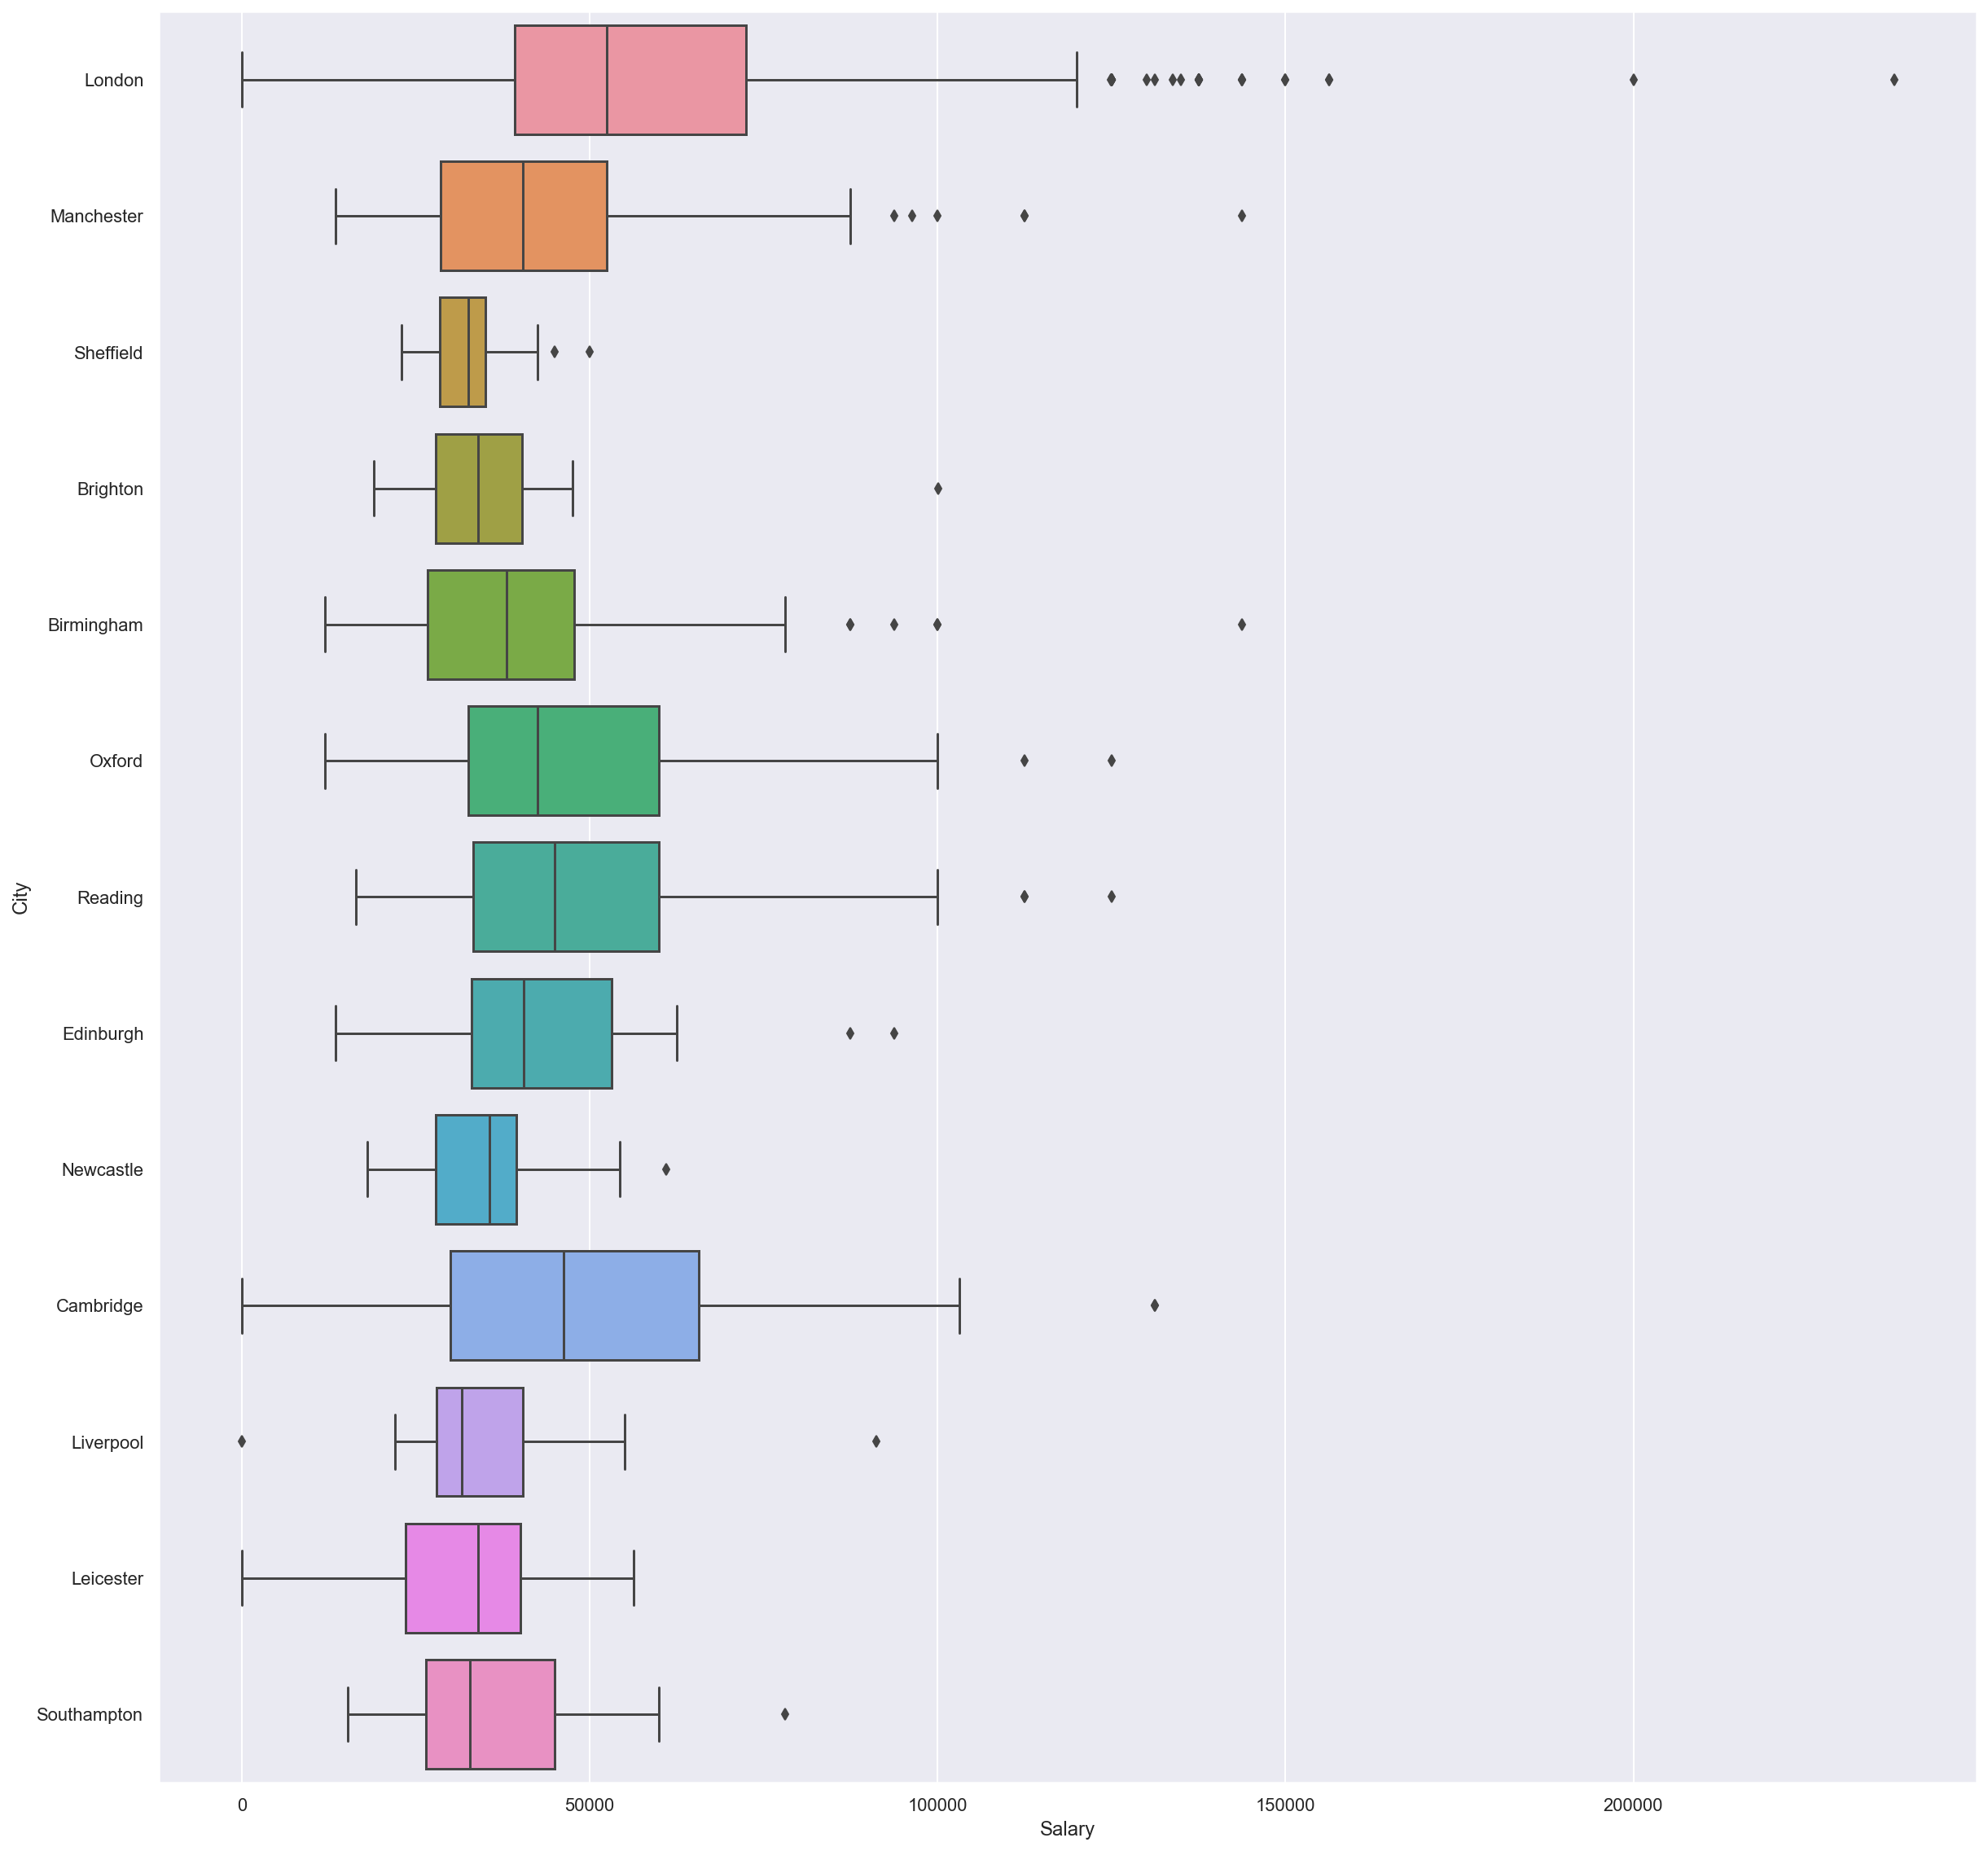

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(font_scale=1.0)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,20), nrows=1)
sns.boxplot(x=I_clean['Salary'], y=I_clean['City'], ax=ax)
plt.show()

In [187]:
## YOUR CODE HERE
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Using only Location
scaler = StandardScaler()
df_for_modelling = Indeedc.copy()

x = pd.get_dummies(df_for_modelling.City, columns=['City'])
y = df_for_modelling.Salary

#Train Test Split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
# Model 1 Score
model = LogisticRegression()
model.fit(xtrain,ytrain)
print(cross_val_score(model,xtrain,ytrain,cv=5).mean())
print(model.score(xtest,ytest))



0.6095238095238096
0.6286919831223629


In [205]:
Dtree = DecisionTreeClassifier(max_features=len(x.columns),max_depth=5,random_state=1)

Dtree.fit(xtrain,ytrain)
print(cross_val_score(Dtree,xtrain,ytrain,cv=5).mean())
print(Dtree.score(xtest,ytest))


0.6126984126984126
0.6708860759493671


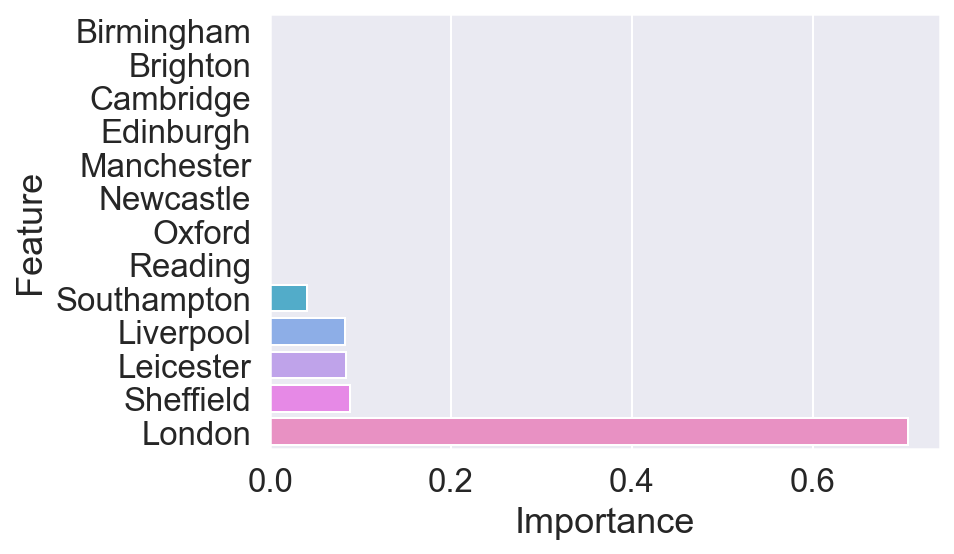

In [206]:
#Feature importances and Model coefficients:
feature_importances = pd.DataFrame(list(zip(x.columns,Dtree.feature_importances_)), columns=['Feature', 'Importance']
            ).sort_values(by='Importance')
sns.barplot(x=feature_importances.Importance,y=feature_importances.Feature);

In [211]:
model.coef_[0]

array([-0.08613156, -0.1590058 ,  0.05499541, -0.01283502, -0.27061059,
       -0.23134821,  0.3661795 , -0.05329314, -0.05733035,  0.08432348,
        0.03237877, -0.2872492 , -0.14526224])

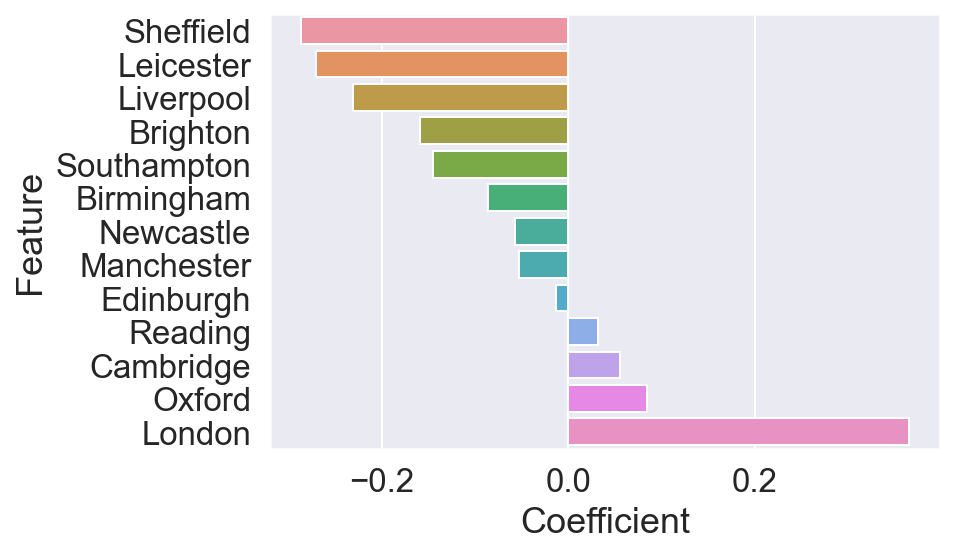

In [212]:
feature_coefs = pd.DataFrame(list(zip(x.columns,model.coef_[0])), columns=['Feature', 'Coefficient']
            ).sort_values(by='Coefficient')
sns.barplot(x=feature_coefs.Coefficient,y=feature_coefs.Feature);

Relatively decent score for the default ridge reguralised model.However as we can see the decision tree classifier slightly outperforms the logistic regression model. This could be due to the decision trees being able to describe the ddata slightly better, however it does risk overfitting if the depth is increaed further.

When looking at the feature importances of the decision tree classifier model, we can see that London appears to be the most important feature, which is as expected due to the high number pf high salary jobs in the city. The depth of the tree influences how many features are used to classify the salaries which is why we see most cities having 0 importance.

Moving onto the logisitc regression model classifier, the penalty used was Ridge and so we can see in the coefficients that some cities had relatively low coefficients and again sheffield and London appear to have the highest impact on the model. 

In [213]:
df_for_modelling.columns


Index(['City', 'Location', 'Company', 'Job', 'Salary', 'Search_Criteria'], dtype='object')

In [218]:
# Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
# Incorporate other text features from the title or summary that you believe will predict the salary.
df_for_modelling['Senior'] = df_for_modelling.Job.apply(lambda x: 1 if 'senior' in x.lower() else 0)
df_for_modelling['Manager'] = df_for_modelling.Job.apply(lambda x: 1 if 'manager' in x.lower() else 0)
df_for_modelling = pd.get_dummies(df_for_modelling,columns=['City','Search_Criteria'])

In [219]:
df_for_modelling.columns

Index(['Location', 'Company', 'Job', 'Salary', 'Senior', 'Manager',
       'City_Birmingham', 'City_Brighton', 'City_Cambridge', 'City_Edinburgh',
       'City_Leicester', 'City_Liverpool', 'City_London', 'City_Manchester',
       'City_Newcastle', 'City_Oxford', 'City_Reading', 'City_Sheffield',
       'City_Southampton', 'Search_Criteria_Data+Analyst',
       'Search_Criteria_Data+Scientist'],
      dtype='object')

In [220]:
df_for_modelling.drop(columns=['Location','Company'],inplace=True)
y = df_for_modelling.pop('Salary')
x = df_for_modelling
xtrain,xtest,ytrain,ytest = train_test_split(df_for_modelling,y,test_size=0.2,stratify=y)

In [233]:
#Count vectorise the Job column useing term frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english',
                                      max_features=1000,
                                      norm='l2'
                      )
tvec.fit(xtrain.Job)
tvec_mat = tvec.transform(xtrain.Job)

In [234]:
a = tvec_mat.sum(axis=0)
pd.DataFrame(a, columns=tvec.get_feature_names()).transpose().sort_values(by=0, ascending=False)[:20]

,0
analyst,153.109329
data,150.801038
scientist,81.006979
senior,60.614347
business,58.272627
bi,36.471607
engineer,29.577639
developer,28.877997
insight,27.753502
learning,27.317311


In [238]:
a = tvec_mat
tvec_train_df = pd.DataFrame(a.toarray(), columns=tvec.get_feature_names(),index=xtrain.index)

In [253]:
# DONT FIT THE XTEST DATA
tvec.fit(xtrain.Job)
tvec_test_mat = tvec.transform(xtest.Job)
b = tvec_test_mat
tvec_test_df = pd.DataFrame(b.toarray(), columns=tvec.get_feature_names(),index=xtest.index)

In [254]:
xtrain_df = pd.concat([xtrain,tvec_df],axis=1)
xtest_df = pd.concat([xtest,tvec_test_df],axis=1)

In [255]:
xtrain_df.shape

(945, 537)

In [256]:
xtrain_df.drop(columns=['Job'],inplace=True)
xtest_df.drop(columns=['Job'],inplace=True)

In [257]:
#DecisionTree model 
Dtree2 = DecisionTreeClassifier(max_depth=5,random_state=1)

Dtree2.fit(xtrain_df,ytrain)
print(cross_val_score(Dtree2,xtrain_df,ytrain,cv=5).mean())
print(Dtree2.score(xtest_df,ytest))

0.7206349206349205
0.7468354430379747


In [264]:
#LogisticRegression model
model2 = LogisticRegression(max_iter=10000)
model2.fit(xtrain_df,ytrain)
print(cross_val_score(model2,xtrain_df,ytrain,cv=5).mean())
print(model2.score(xtest_df,ytest))

0.7566137566137566
0.7468354430379747


In [268]:
#Coeffs and Feature importances of new models
df_coef = pd.DataFrame(model2.coef_[0], index=xtrain_df.columns,
                       columns=['coefficients'])
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef['coef_abs'].sort_values().tail(20)

principal         0.989691
senior            1.037560
City_Sheffield    1.050192
engineer          1.101884
mi                1.127232
business          1.192993
protection        1.222287
ecommerce         1.244242
City_London       1.248522
postdoctoral      1.273143
support           1.309495
statistical       1.320951
intelligence      1.348271
developer         1.358304
head              1.426757
analyst           1.576777
junior            1.601077
bi                1.670121
instructor        1.899759
lead              2.478726
Name: coef_abs, dtype: float64

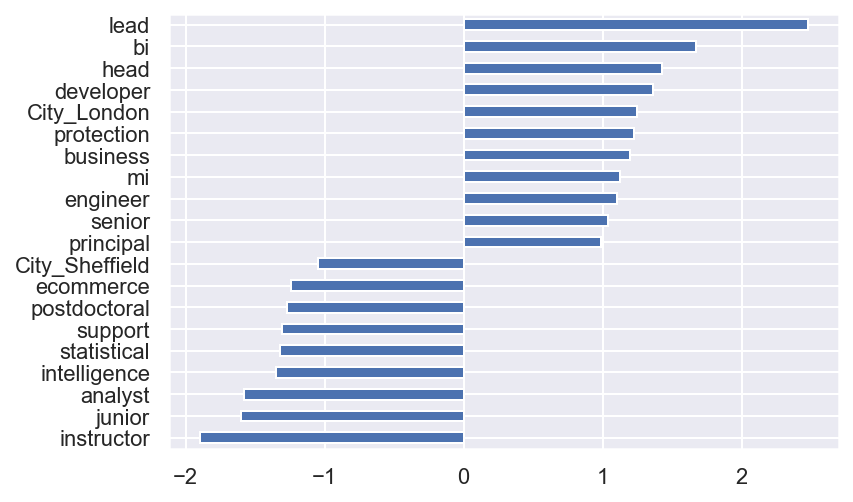

In [271]:
indicies_to_plot = [index for index in list(df_coef['coef_abs'].sort_values(ascending=False).head(20).index)]
df_coef['coefficients'].loc[indicies_to_plot].sort_values().plot(kind='barh');

As is shown now the features that have the most impact on the model tend to be the words from 
the vectoriser and the again London and sheffield appear to be cities which have influence of the salary.

In [298]:
#GridSearch the Logistic Regression model
from sklearn.model_selection import GridSearchCV
model3 = LogisticRegression(solver='saga',max_iter=10000)

In [299]:
model3.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [300]:
params = {'C':np.logspace(-4, 4, 10),
          'penalty':['l2','l1'],
         }
LrCV_grid = GridSearchCV(model3,params,cv=5,verbose=1)

In [301]:
LrCV_grid.fit(xtrain_df,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.6min finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [305]:
bestLR_model = LrCV_grid.best_estimator_
bestLR_model

LogisticRegression(C=21.54434690031882, max_iter=10000, solver='saga')

In [308]:
bestLR_model.get_params()

{'C': 21.54434690031882,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [303]:
LrCV_grid.best_score_

0.783068783068783

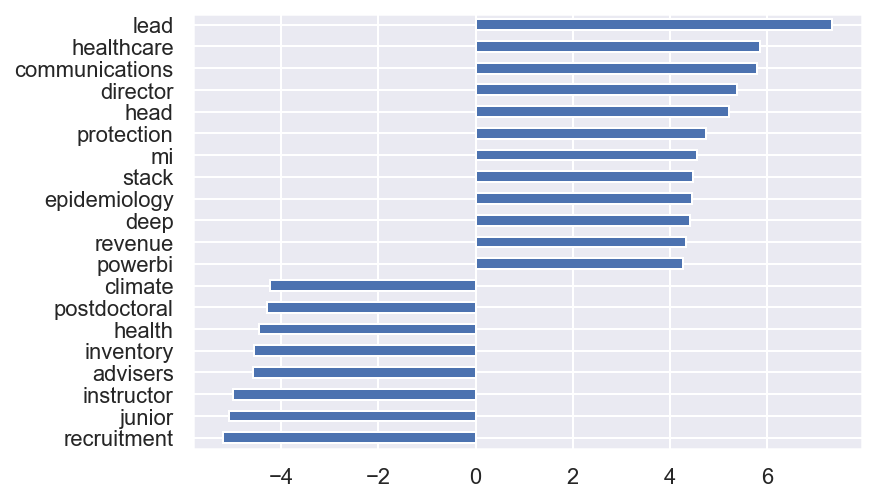

In [306]:
df_coef = pd.DataFrame(bestLR_model.coef_[0], index=xtrain_df.columns,
                       columns=['coefficients'])
df_coef['coef_abs'] = df_coef.coefficients.abs()
indicies_to_plot = [index for index in list(df_coef['coef_abs'].sort_values(ascending=False).head(20).index)]
df_coef['coefficients'].loc[indicies_to_plot].sort_values().plot(kind='barh');

In [329]:
bestLR_model.predict_proba(xtest_df)[10]

array([0.02200286, 0.97799714])

In [328]:
## YOUR CODE HERE
from sklearn.metrics import classification_report
#Adjust LogisticRegression model by increasing threshold certainty 
def predict_at_threshold(x, threshold=0.0001):
    if x >= threshold:
        return 1
    else:
        return 0

Y_pp = pd.DataFrame(bestLR_model.predict_proba(xtest_df),
             columns=['class_0_pp', 'class_1_pp'])
Y_pp['pred_class_thresh'] = Y_pp.class_1_pp.apply(predict_at_threshold, 
                                                threshold=0.999)  
print(classification_report(ytest, Y_pp.pred_class_thresh))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       118
           1       1.00      0.02      0.03       119

    accuracy                           0.51       237
   macro avg       0.75      0.51      0.35       237
weighted avg       0.75      0.51      0.35       237



Precision for class 1 = 100% so the predictons for class 1 , the high salary, are all correct, out of those that were predicited 1, having a lot were misclassified as low salary. 

In [309]:
predictions = bestLR_model.predict(xtest_df)
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       118
           1       0.73      0.76      0.74       119

    accuracy                           0.74       237
   macro avg       0.74      0.74      0.74       237
weighted avg       0.74      0.74      0.74       237



In [310]:
predictions = Dtree2.predict(xtest_df)
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       118
           1       0.77      0.71      0.74       119

    accuracy                           0.75       237
   macro avg       0.75      0.75      0.75       237
weighted avg       0.75      0.75      0.75       237



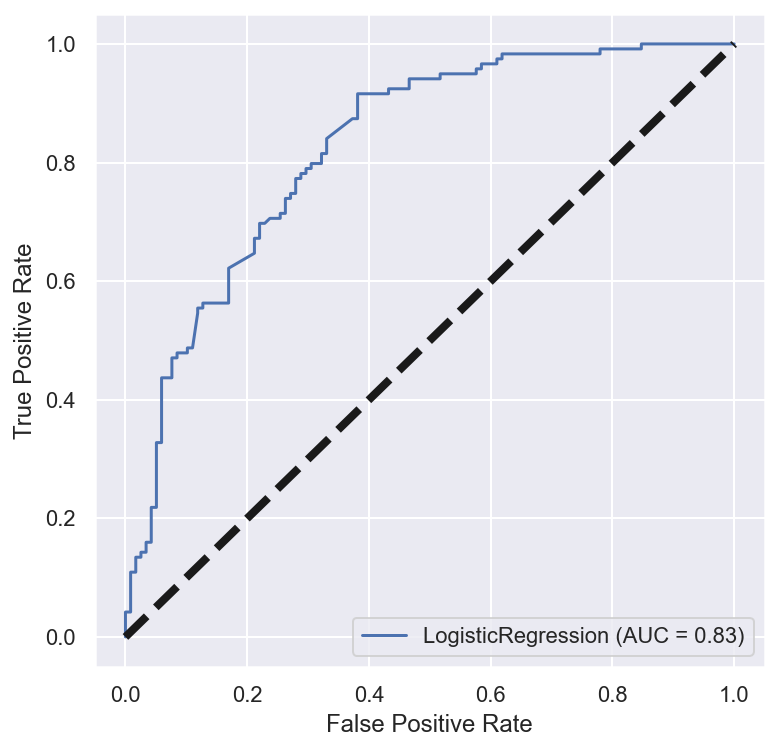

In [316]:
# Plot the ROC and precision-recall curves for at least one of your models.
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(bestLR_model, xtest_df, ytest, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

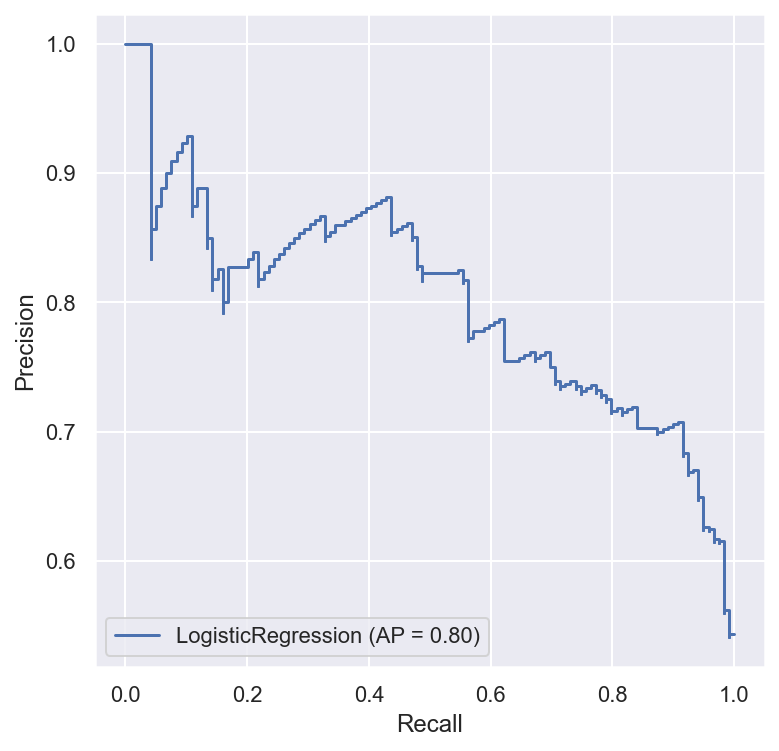

In [317]:
plt.fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(bestLR_model, xtest_df, ytest, ax=ax)
plt.show()

## YOUR TEXT HERE IN MARKDOWN FORMAT 
Firstly, a logistic regression model using a ridge penalty on only the City column was used to predict salary classification. This model performed adequately, outperforming the baseline prediction which refers to the mean of the salary classes, 0 being low salary class and 1 being high salary. This model achieved an accuracy score of 0.63. Another decision tree classification model using the City column was evaluated, this type of model can sometimes overfit the data as the tree depth is increased, and so the depth was kept at 5. This model slightly outperformed the Ridge logistic regression model with a score of 0.67 on the test data. 



The model’s complexity was increased by adding further features. Notably the Job column was transformed using a term frequency word vectorizer, this enables the model to highlight the words which have significant correlation on the salaries by weighting their importance on how often the words appear in the job title giving higher weightings to the less frequent words. When these features were added it was found that the models accuracy increased significantly to 0.75 for both models, interestingly the Logistic Regression model outperformed the decision tree model on the training data, suggesting that it generalises to the data better. 


Both models appeared to agree on which features had the greatest impact on predicting salaries. For example, both viewed London and Sheffield as having high predictive power as well as key words like ‘principal’ and ‘senior’ as can be seen from their feature importance’s and coefficients, respectively. 

A grid search was constructed on the logistic regression model to fine tune its parameters.  The best model appeared to use a Ridge penalty which diminishes the coefficients of less important features. This model achieved an accuracy score of 0.78.
Moving onto the classification reports, the logistic regression model found from the grid search outperformed the decision tree model on precision scoring which evaluates how many true predictions of the class was made from all the predictions for that class. 
However   decision tree model scored better on both recall and f1 scores which evaluates how many times the predicted label was positive out of all the times the true label was positive as well, with the f1 score  finding the harmonic mean of the two scores. 
$$ F_1 = 2 \cdot \frac{1}{\tfrac{1}{\mathrm{recall}} + \tfrac{1}{\mathrm{precision}}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$$


In conclusion, despite the lower test score, one might prefer the decision tree model due to its higher recall and f1 scores. This can be explained by the fact that the decision tree forms specific questions to classify the data which relates well to the features of this dataset.